In [ ]:
#importing libraries
import pandas as pd
import numpy as np

#for visulization
import matplotlib.pyplot as plt
import seaborn as seaborn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv('heart_failure_clinical_records_dataset.csv')    #csv file for training data
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Exploratory Data Analyasis

In [ ]:
df.isnull().sum()
#There is no null value

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
df.info()
#check the datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
#all unique values of training data
for i in df:
    print(i,":",len(df[i].unique()))

age : 47
anaemia : 2
creatinine_phosphokinase : 208
diabetes : 2
ejection_fraction : 17
high_blood_pressure : 2
platelets : 176
serum_creatinine : 40
serum_sodium : 27
sex : 2
smoking : 2
time : 148
DEATH_EVENT : 2


In [ ]:
#label Encoding
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['creatinine_phosphokinase']=label_encoder.fit_transform(df["creatinine_phosphokinase"])
df['platelets']=label_encoder.fit_transform(df["platelets"])
df['serum_sodium']=label_encoder.fit_transform(df["serum_sodium"])

In [ ]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
df['DEATH_EVENT'].value_counts()       #0=not survived
                                      #1=survived

0    203
1     96
Name: DEATH_EVENT, dtype: int64

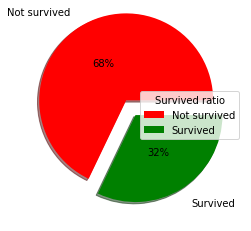

In [ ]:
a = df['DEATH_EVENT'].value_counts()
labels = ['Not survived', 'Survived']
explode = [0.2,0] 
colors = ['red', 'green'] 
plt.pie(a, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2, explode=explode, colors=colors, shadow = True) 

plt.legend(title = "Survived ratio")
plt.show() 

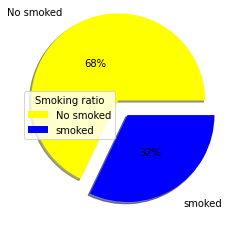

In [ ]:
a = df['smoking'].value_counts()
labels = ['No smoked', 'smoked']
explode = [0.2,0] 
colors = ['yellow', 'blue'] 
plt.pie(a, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2, explode=explode, colors=colors, shadow = True) 

plt.legend(title = "Smoking ratio")
plt.show() 

Text(0, 0.5, 'AGE')

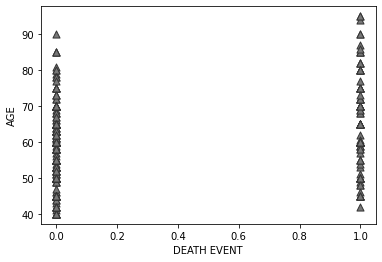

In [ ]:
x = df['DEATH_EVENT']
y = df['age']
plt.scatter(x, y, 
            c ="#787878",#color of marker
            linewidths = 1, #width of marker
            marker ="^", #shape of marker
            edgecolor ="#343434", #edge color of marker
            s = 50) #size of marker

plt.xlabel("DEATH EVENT")
plt.ylabel("AGE")

Splitting The Data

In [ ]:
x=df[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']]
y=df[['DEATH_EVENT']]

In [ ]:
x

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,144,0,20,1,93,1.9,9,1,0,4
1,55.0,0,207,0,38,0,91,1.1,15,1,0,6
2,65.0,0,66,0,20,0,26,1.3,8,1,1,7
3,50.0,1,44,0,20,0,49,1.9,16,1,0,7
4,65.0,1,74,1,20,0,133,2.7,1,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,12,1,38,1,24,1.1,22,1,1,270
295,55.0,0,186,0,38,0,97,1.2,18,0,0,271
296,45.0,0,191,1,60,0,174,0.8,17,0,0,278
297,45.0,0,195,0,38,0,17,1.4,19,1,1,280


In [ ]:
y

,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1
...,...
294,0
295,0
296,0
297,0


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier  #Gradient boosting is a machine learning technique used in regression and classification tasks, among others. It gives a prediction model in the form of an ensemble of weak prediction models, which are typically decision trees.
model = GradientBoostingClassifier(n_estimators = 100, max_depth = 2, learning_rate=0.1)

In [ ]:
x_train.shape

(239, 12)

In [ ]:
y_train.shape

(239, 1)

In [ ]:
model.fit(x_train,y_train)
#passing the x_train and Y_train to the model

GradientBoostingClassifier(max_depth=2)

In [ ]:
#predicting the result
predict=model.predict(x_test)

In [ ]:
model.score(x_test,y_test)*100 #accuracy

73.33333333333333

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
error = mean_absolute_error(predict,y_test)*100
error#error

26.666666666666668

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
x=df.iloc[:,:-1].values     #age
x

array([[ 75.,   0., 144., ...,   1.,   0.,   4.],
       [ 55.,   0., 207., ...,   1.,   0.,   6.],
       [ 65.,   0.,  66., ...,   1.,   1.,   7.],
       ...,
       [ 45.,   0., 191., ...,   0.,   0., 278.],
       [ 45.,   0., 195., ...,   1.,   1., 280.],
       [ 50.,   0.,  87., ...,   1.,   1., 285.]])

In [ ]:
y=df.iloc[:,-1].values    #death events
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

For Regression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
xtrain

array([[ 45.,   1.,  58., ...,   1.,   1., 121.],
       [ 55.,   0.,  16., ...,   1.,   0., 233.],
       [ 68.,   1., 172., ...,   1.,   0., 197.],
       ...,
       [ 85.,   0., 205., ...,   1.,   1.,  72.],
       [ 77.,   1.,  42., ...,   1.,   0., 209.],
       [ 82.,   1., 163., ...,   0.,   0.,  30.]])

In [ ]:
xtest

array([[ 50.   ,   1.   ,  47.   ,   0.   ,  20.   ,   0.   ,  39.   ,
          0.8  ,  18.   ,   1.   ,   0.   , 146.   ],
       [ 45.   ,   0.   , 144.   ,   1.   ,  55.   ,   0.   , 172.   ,
          1.   ,  11.   ,   0.   ,   0.   , 250.   ],
       [ 53.   ,   1.   ,  30.   ,   0.   ,  20.   ,   1.   , 160.   ,
          1.4  ,  18.   ,   0.   ,   0.   ,  43.   ],
       [ 52.   ,   0.   ,  60.   ,   0.   ,  30.   ,   0.   ,  56.   ,
          0.7  ,  15.   ,   1.   ,   1.   , 112.   ],
       [ 65.   ,   1.   ,  62.   ,   0.   ,  35.   ,   1.   , 110.   ,
          0.8  ,  13.   ,   1.   ,   0.   , 194.   ],
       [ 65.   ,   0.   ,  77.   ,   0.   ,  30.   ,   0.   ,  87.   ,
          0.8  ,  17.   ,   0.   ,   0.   , 186.   ],
       [ 60.   ,   1.   , 108.   ,   1.   ,  30.   ,   0.   ,  21.   ,
          1.   ,  16.   ,   1.   ,   1.   , 245.   ],
       [ 55.   ,   0.   ,  42.   ,   0.   ,  35.   ,   0.   ,  84.   ,
          1.1  ,  18.   ,   1.   ,   1.   ,  60.   ],


In [ ]:
ytrain

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1])

In [ ]:
ytest

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
ypred=model.predict(xtest)
ypred

array([ 3.03424141e-01, -2.09168647e-01,  5.68639452e-01,  3.22758085e-01,
        5.33168285e-02,  2.09012693e-01,  1.11039118e-01,  4.12145576e-01,
        5.33072807e-01, -1.97395305e-01,  6.01021161e-01,  6.80452058e-01,
        6.69146848e-01,  1.78850645e-01,  2.83134146e-01, -5.37887560e-02,
        4.65275111e-01,  5.28342730e-01, -1.53914201e-01,  4.66188056e-01,
        2.06760849e-01,  7.41189763e-01,  2.01897115e-01,  7.31467915e-01,
        2.36918687e-01,  4.68378666e-01, -3.12272906e-01,  3.83486730e-01,
        2.50586609e-01,  2.07842916e-02,  7.84345514e-02, -3.72727859e-01,
        3.15684163e-01, -1.00504687e-01,  9.01078182e-01,  4.96799343e-01,
        1.74988837e-01,  5.11076326e-01,  3.61613988e-01, -5.95299926e-02,
        1.14411443e+00,  3.22942622e-01,  3.82836953e-01,  2.91204614e-01,
        4.90760235e-01,  6.70050486e-01,  3.61138269e-01,  1.66438328e-01,
        5.90707413e-01,  2.25632090e-01, -8.39465843e-02, -1.90349689e-01,
        2.44264709e-01,  

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(ytest,ypred)

0.30388815234201116